# Ultimate Challenge

## Part 1 - Exploratory data analysis

In [489]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [490]:
# read in json file
import json
with open('ultimate_data_challenge.json') as datafile:
    data = json.load(datafile)
df = pd.DataFrame(data)

In [491]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [493]:
# read in json file
import json
with open('logins.json') as datafile:
    data = json.load(datafile)
logins = pd.DataFrame(data)

In [494]:
logins.describe()

login_time
count                 93142
unique                92265
top     1970-04-12 04:03:15
freq                      3

In [495]:
logins = pd.to_datetime(logins['login_time'])

In [496]:
logins_ordered = logins.sort_values().reset_index(drop=True)

In [497]:
logins_add_count = logins_ordered.reset_index()
logins_add_count['count'] = logins.index
logins_count = logins_add_count.drop('index', axis=1)
logins_count.head()

login_time  count
0 1970-01-01 20:12:16      0
1 1970-01-01 20:13:18      1
2 1970-01-01 20:16:10      2
3 1970-01-01 20:16:36      3
4 1970-01-01 20:16:37      4

In [498]:
def timeseries_frequency_plot(title, df, timeseries_col, y_col, dStart, dEnd, sample_by = 'D', xtick_freq = 'W'):
    
    '''This function will aggregate a dataframe by count given two columns, the datetime column and any column used to 
    determine frequency'''
    
    timeseries_vs_y = df[[timeseries_col, y_col]]
    plot_df = timeseries_vs_y.set_index(timeseries_col).resample(sample_by)[y_col].count()
    df = plot_df[(dStart <= plot_df.index) & (plot_df.index <= dEnd)]

    ax = plt.figure(figsize=(20, 6)).add_subplot(111)   
    xticks = pd.date_range(start=dStart, end=dEnd, freq=xtick_freq)

    df.plot(ax = ax, xticks=xticks)
    
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels([x.strftime('%h%d\n%a\n%-I%p\n%Y') for x in xticks])
    
    ### below are vertical lines used to illustrate high volume periods in the examples below
    
    ## Weekday trend lines
    # ax.axvline(pd.to_datetime('1970-2-19 12:00:00'), color='r', linestyle='--', lw=2)
    # ax.axvline(pd.to_datetime('1970-2-20 00:00:00'), color='r', linestyle='--', lw=2)
    
    ## Weekend trend lines
    # ax.axvline(pd.to_datetime('1970-2-21 04:00:00'), color='r', linestyle='--', lw=2)
    # ax.axvline(pd.to_datetime('1970-2-22 04:00:00'), color='r', linestyle='--', lw=2)
    
    ax.tick_params(axis='x', which='major', pad=15)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
    
    plt.show()

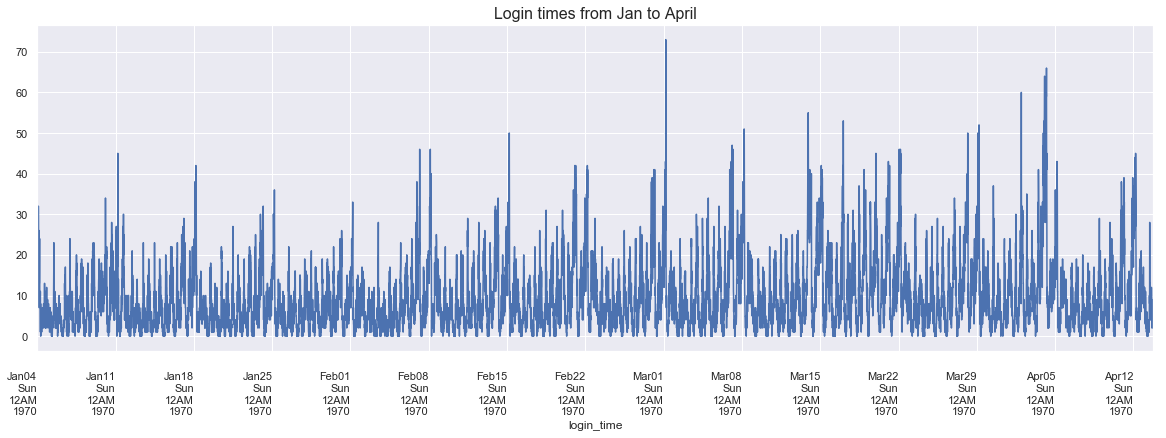

In [499]:
import datetime as dt
# Beginning and end dates of the dataframe
dStart = dt.datetime(1970,1,4) # Jan 4th, 1970
dEnd = dt.datetime(1970,4,13,18,57,38) # April 13th 1970
timeseries_frequency_plot('Login times from Jan to April', logins_count, 'login_time', 'count', dStart=dStart, dEnd=dEnd, sample_by='15min')

> There appears to be a weekly pattern among logins with Sundays being the peak day of the week. 

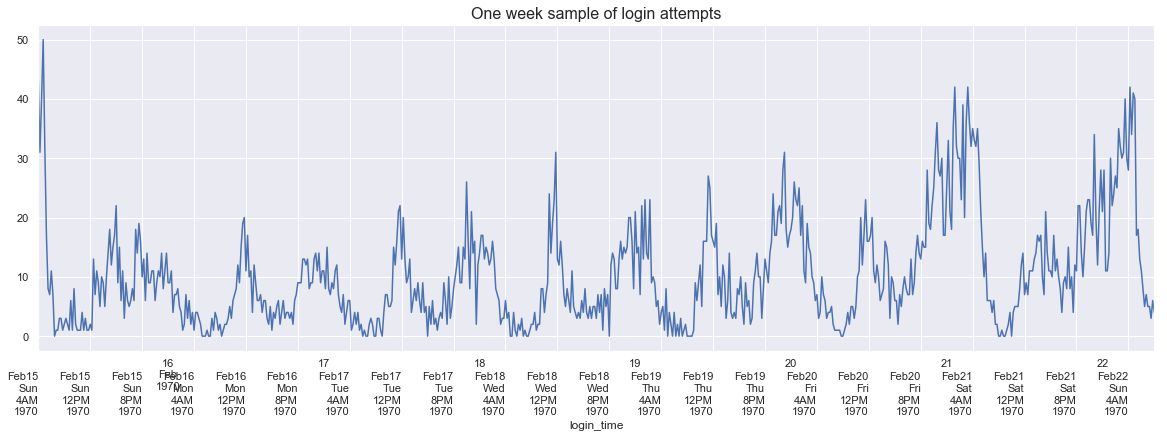

In [500]:
import datetime as dt
# Sample week
dStart = dt.datetime(1970,2,15,4) # Feb 15th
dEnd = dt.datetime(1970,2,22, 8) # Feb 22nd
#dEnd = dt.datetime(1970,4,,18,57,38) # 1 July
timeseries_frequency_plot('One week sample of login attempts', logins_count, 'login_time', 'count', dStart=dStart, dEnd=dEnd, sample_by='15min', xtick_freq = '8H')

> Narrowing this down to just one week reveals daily patterns with a peak around 4am for Saturday and Sunday. During the week, there are typically peaks around the afternoon (around 12pm) and the evening around midnight. 

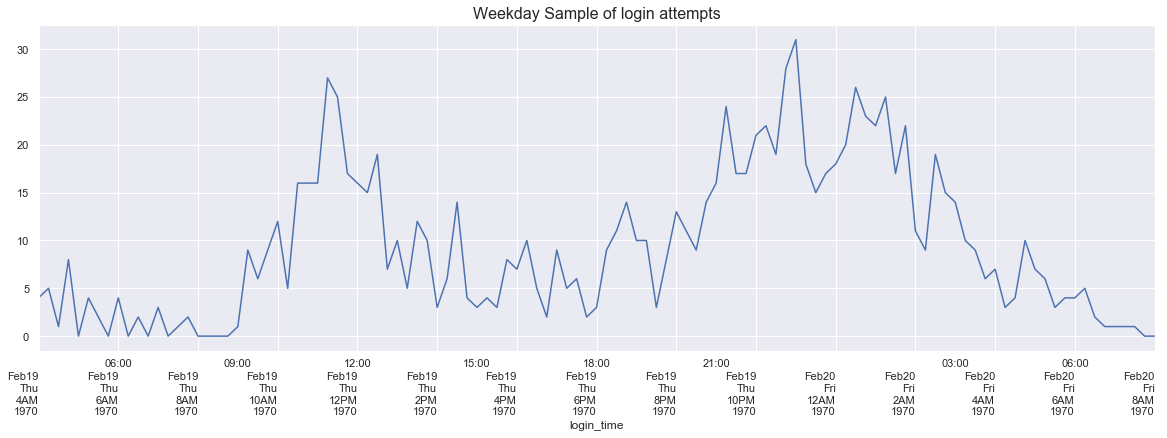

In [501]:
# Sample weekday
dStart = dt.datetime(1970,2,19,4) # Feb 19th
dEnd = dt.datetime(1970,2,20, 8) # Feb 20th
timeseries_frequency_plot('Weekday Sample of login attempts', logins_count, 'login_time', 'count', dStart=dStart, dEnd=dEnd, sample_by='15min', xtick_freq = '2H')

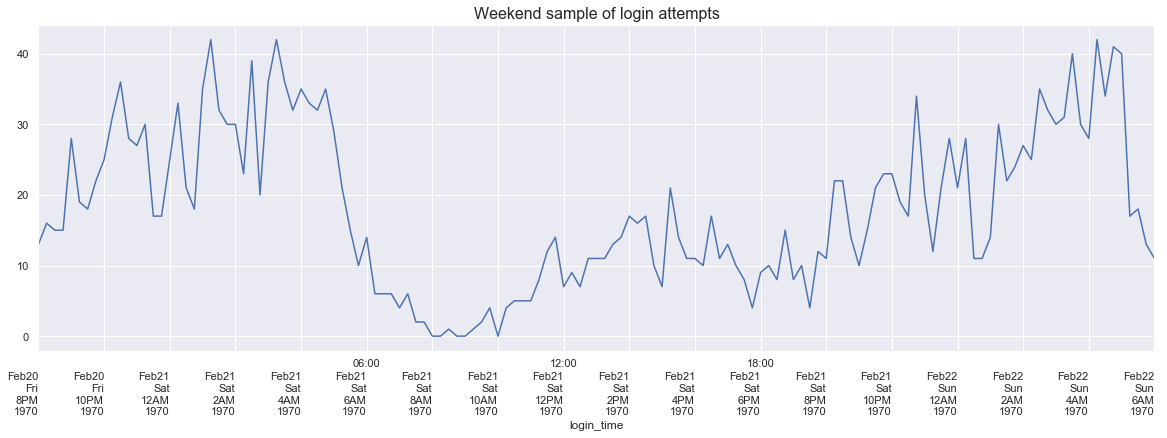

In [502]:
# Sample weekend
dStart = dt.datetime(1970,2,20,20) # Feb 20th
dEnd = dt.datetime(1970,2,22, 6) # Feb 22nd
timeseries_frequency_plot('Weekend sample of login attempts', logins_count, 'login_time', 'count', dStart=dStart, dEnd=dEnd, sample_by='15min', xtick_freq = '2H')

> The data seems to clearly indicate times for a typical rider to need transportation. I would go as far as to assume this is a sample from the east coast, as bars close at 4am over there!

## Part 2 ‑ Experiment and metrics design

If tolls are reimbursed, drivers from both cities will be more drawn to surging areas and as a result will pick up riders from both cities more evenly. An experiment to judge the effectiveness of this incentive would be an A/B test, where half of the drivers would be given this incentive and half would see no change. Since the metric of interest relies solely on individual driver habits, changes should be mutually independent to each group. The experiment should run over a three month cycle where driver pickup locations are noted. The importance of structuring the experiment as an A/B test is to account for changes in demand over the time period between groups.

Our null hypothesis in this experiment would be that bridge toll reimbursement has no effect on the variability of drivers pickup locations. Our alternative hypothesis would be that the incentive decreases variability of pickup location (meaning there is less bias among drivers). Our goal is not to measure if there is an increase in activity among drivers, it is to see if the incentive motivates drivers to pick up riders in alternating cities. If a driver who primarily picks up riders in Gotham then begins to pick up riders in Metropolis due to demand and free toll, this would decrease his bais. If we define bias as the tendency for drivers to prefer one city over the other, then zero bias would be a driver who picks up riders in each city about 50% of the time. If you measure each rider in this way, we would see a decrease in variability as drivers begin to even out their rider pickups between both cities. 

The experimental results would be analyzed for statistical significance using Lavene's test, which tests whether the variances of two groups are approximately equal. Significance would be determined using the F-test, which assumes data are normally distributed and groups are independent, which are true in this case. Since we want to know if variance has *decreased*, this would be interpreted as a one sided test for significance. 

The experimental results, if performed in this way, would inform Ultimate of how reimbursed tolls affect driver habits between cities. If a decrease in bias is observed, this does not necessarily mean an increase in driver availability across both cities however, drivers will simply be less constrained to one city over during their shift. Further experiments would need to be run in order to determine its effectiveness in increasing availability during peak hours for both cities. If the experiment is a success however, drivers and riders alike should see a benefit.

## Part 3 - Predictive Modeling

In [503]:
df.describe()

trips_in_first_30_days  avg_rating_of_driver     avg_surge  \
count            50000.000000          41878.000000  50000.000000   
mean                 2.278200              4.601559      1.074764   
std                  3.792684              0.617338      0.222336   
min                  0.000000              1.000000      1.000000   
25%                  0.000000              4.300000      1.000000   
50%                  1.000000              4.900000      1.000000   
75%                  3.000000              5.000000      1.050000   
max                125.000000              5.000000      8.000000   

          surge_pct   weekday_pct      avg_dist  avg_rating_by_driver  
count  50000.000000  50000.000000  50000.000000          49799.000000  
mean       8.849536     60.926084      5.796827              4.778158  
std       19.958811     37.081503      5.707357              0.446652  
min        0.000000      0.000000      0.000000              1.000000  
25%        0.000000     33.300000      2.420000              4.700000  
50%        0.000000     66.700000      3.880000              5.000000  
75%        8.600000    100.000000      6.940000              5.000000  
max      100.000000    100.000000    160.960000              5.000000

In [504]:
df.describe(exclude=[int, float])

city signup_date last_trip_date   phone ultimate_black_user
count        50000       50000          50000   49604               50000
unique           3          31            182       2                   2
top     Winterfell  2014-01-18     2014-06-29  iPhone               False
freq         23336        2948           2036   34582               31146

In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Steps to take:
- impute the avg_rating_of_driver and avg_rating_by_driver by the average for each column
- impute phone by keeping the overall average the same (look up impute by average for categorical)

Interesting columns that may have a correlation to rider retention:
- city
- trips_in_first_30_days
- surge_pct
- ultimate_black_user
- weekday_pct
- avg_dist

Strategy for determining which factors contribute to rider retention:
- Create new column for whether a rider is retained or not. 
- Explore the interesting columns with whether a rider is retained.
- Do some statistical analysis to prove significance.


In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [507]:
# impute missing values with the mean
impute_columns = ['avg_rating_of_driver', 'avg_rating_by_driver']
df[impute_columns] = df[impute_columns].fillna(df.mean())

In [508]:
# replace missing phone entries with the most frequent type
df['phone'] = df['phone'].fillna(df['phone'].value_counts().index[0])

In [509]:
# convert dates to datetime
datetime_cols = ['signup_date', 'last_trip_date']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col])

In [510]:
# What is the cutoff date for a rider to be classified as retained?
from datetime import datetime, timedelta
cutoff_day = df.last_trip_date.max() - timedelta(days=30)

In [511]:
# define indices for those who are considered retained and not
retained_index = df[df['last_trip_date'] >= cutoff_day].index
cutoff_index = df[df['last_trip_date'] < cutoff_day].index

# Create new column with retained = 1 and not retained = 0
df.loc[cutoff_index, 'retained'] = 0
df.loc[retained_index, 'retained'] = 1

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
retained                  50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(7), int64(1), object(2)
memory usage: 4.6+ MB


In [513]:
def get_pct_retained_by_category(df, category):
    retained = df.groupby([category, 'retained']).agg({'retained': 'count'})
    retained_pct = retained.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
    
    return retained_pct

In [514]:
def overlayed_labeled_bar_graph(x, y1, y2, bar_labels):
    style = dict(size=15, color='grey')
    ax = plt.figure(figsize=(10, 6)).add_subplot(111)
    
    plt.bar(x, y1)
    plt.bar(x, y2)
    
    
    
    for i, title, label in zip(range(len(x)), x, bar_labels):
        ax.text(title, y1[i], label, ha="center", **style)

In [515]:
# How does retention compare accross cities?
pct_retained_by_city = get_pct_retained_by_category(df, 'city')

In [516]:
astopor_pct_retained = pct_retained_by_city['retained'][1]
kings_landing_pct_retained = pct_retained_by_city['retained'][3]
winterfell_pct_retained = pct_retained_by_city['retained'][5]

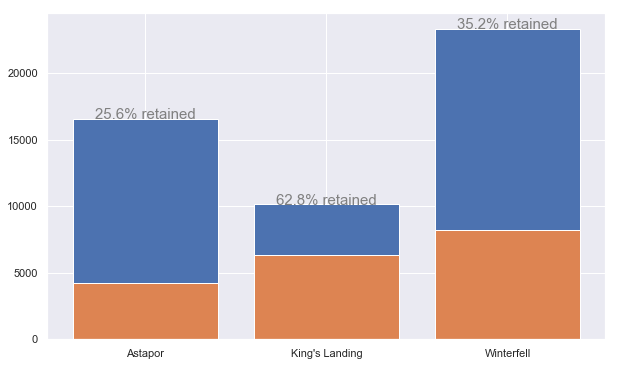

In [517]:
bar_labels = ["{}% retained".format(round(astopor_pct_retained, 1)),
              "{}% retained".format(round(kings_landing_pct_retained, 1)),
              "{}% retained".format(round(winterfell_pct_retained, 1))]

y1 = df.groupby('city')['retained'].count()
y2 = df.groupby('city')['retained'].sum()

overlayed_labeled_bar_graph(cities, y1, y2, bar_labels)

> Kings landing seems to do the best with retention. They also have a smaller subset of subscribers however.

In [518]:
# How do black users compare?
pct_retained_black = get_pct_retained_by_category(df, 'ultimate_black_user')
pct_retained_black

retained
ultimate_black_user retained           
False               0.0       70.118153
                    1.0       29.881847
True                0.0       49.628726
                    1.0       50.371274

In [519]:
pct_retained_black_user = pct_retained_black['retained'][0][1]
pct_retained_non_black_user = pct_retained_black['retained'][3]

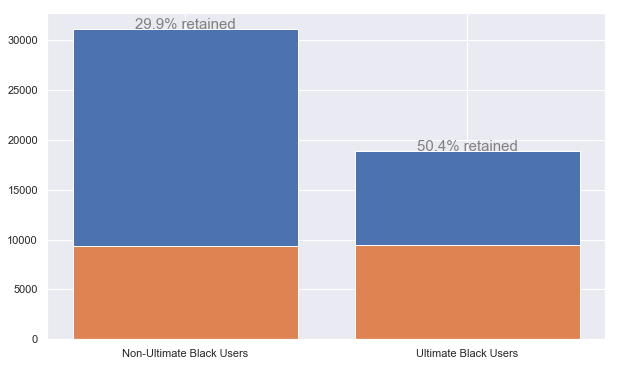

In [520]:
bar_labels = ["{}% retained".format(round(pct_retained_black_user, 1)),
              "{}% retained".format(round(pct_retained_non_black_user, 1))]

x_labels = ['Non-Ultimate Black Users', 'Ultimate Black Users']

y1 = df.groupby('ultimate_black_user')['retained'].count()
y2 = df.groupby('ultimate_black_user')['retained'].sum()

overlayed_labeled_bar_graph(x_labels, y1, y2, bar_labels)

In [521]:
# How do black users compare?
pct_retained_by_phone = get_pct_retained_by_category(df, 'phone')
pct_retained_android = pct_retained_black['retained'][0][1]
pct_retained_iphone = pct_retained_black['retained'][3]

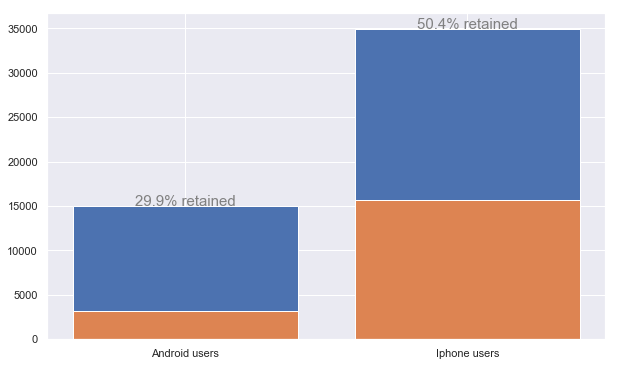

In [522]:
bar_labels = ["{}% retained".format(round(pct_retained_android, 1)),
              "{}% retained".format(round(pct_retained_iphone, 1))]

x_labels = ['Android users', 'Iphone users']

y1 = df.groupby('phone')['retained'].count()
y2 = df.groupby('phone')['retained'].sum()

overlayed_labeled_bar_graph(x_labels, y1, y2, bar_labels)

In [523]:
# define indices for those who are considered retained and not
took_trip_index = df[df['trips_in_first_30_days'] > 0].index
no_trip_index = df[df['trips_in_first_30_days'] == 0].index

# add column to indicate those who took a trip in the first 30 days and those who did not
df.loc[no_trip_index, 'took_trip_first_30_days'] = 0
df.loc[took_trip_index, 'took_trip_first_30_days'] = 1

In [524]:
# How do black users compare?
pct_retained_early_trips = get_pct_retained_by_category(df, 'took_trip_first_30_days')
pct_retained_no_trip = pct_retained_early_trips['retained'][0][1]
pct_retained_trip = pct_retained_early_trips['retained'][3]

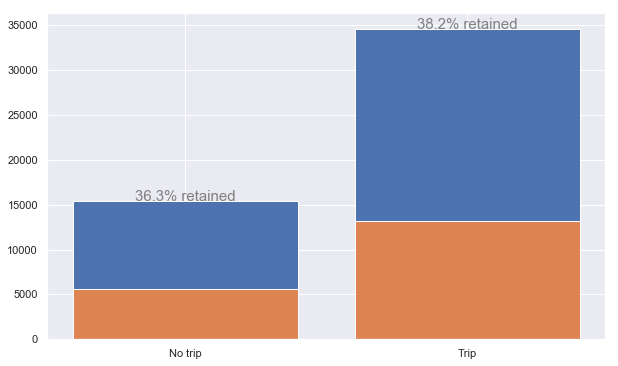

In [525]:
bar_labels = ["{}% retained".format(round(pct_retained_no_trip, 1)),
              "{}% retained".format(round(pct_retained_trip, 1))]

x_labels = ['No trip', 'Trip']

y1 = df.groupby('took_trip_first_30_days')['retained'].count()
y2 = df.groupby('took_trip_first_30_days')['retained'].sum()

overlayed_labeled_bar_graph(x_labels, y1, y2, bar_labels)

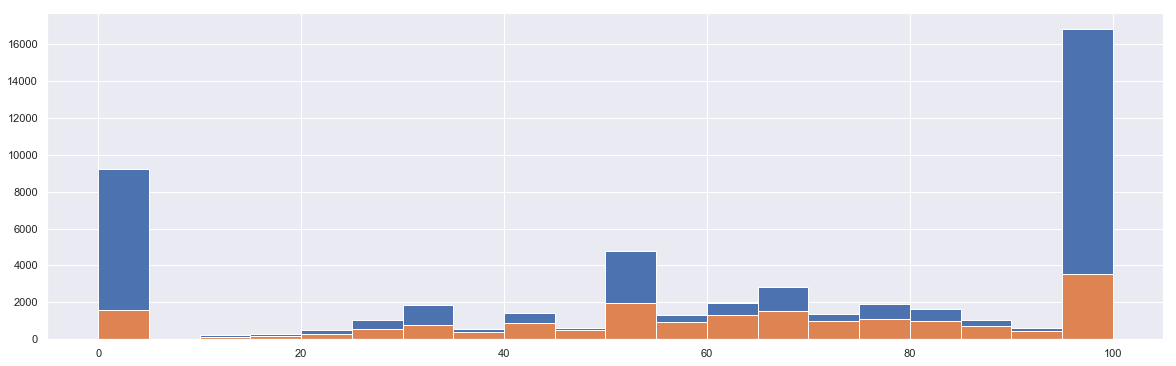

In [526]:
# Are those who use the service mostly during the week more likely to be retained?
ax = plt.figure(figsize=(20, 6))
ax = plt.hist(df['weekday_pct'], bins=20)
ax = plt.hist(df[df['retained'] == 1]['weekday_pct'], bins=20)
plt.show()

In [527]:
#define func to find ecdf of dataset
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

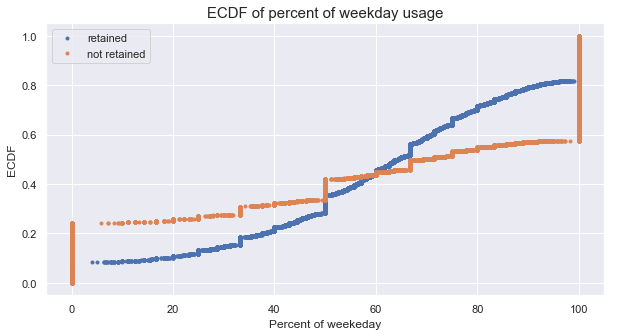

In [536]:
retained = df.weekday_pct.loc[df['retained'] == 1]
not_retained = df.weekday_pct.loc[df['retained'] == 0]

#set fig size
%matplotlib inline
plt.figure(figsize=(10,5))

x_active, y_active = ecdf(retained)
x_inactive, y_inactive = ecdf(not_retained)

plt.plot(x_active, y_active, marker='.', linestyle='none')
plt.plot(x_inactive, y_inactive, marker='.', linestyle='none')
plt.title('ECDF of percent of weekday usage', size = 15)
plt.xlabel('Percent of weekeday')
plt.ylabel('ECDF')
plt.legend(['retained', 'not retained'])
plt.show()

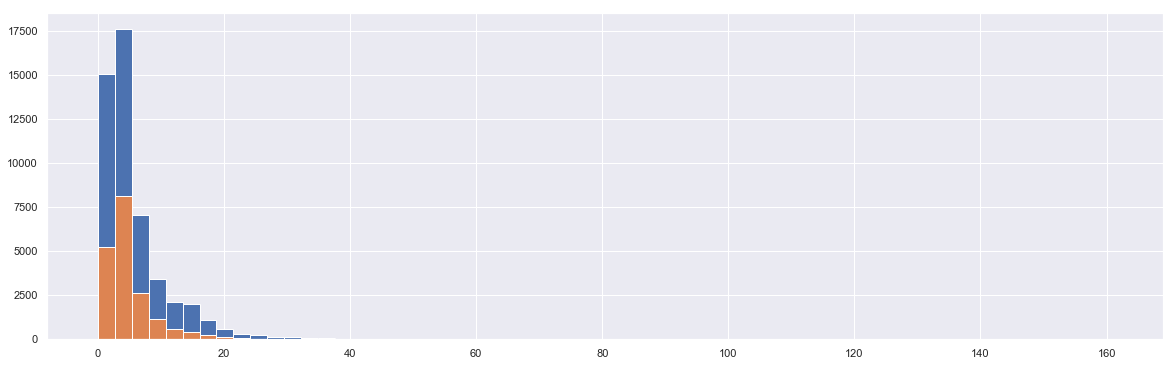

In [422]:
# Are those who take longer trips more likely to be retained?
ax = plt.figure(figsize=(20, 6))
plt.hist(df['avg_dist'], bins=60)
plt.hist(df[df['retained'] == 1]['avg_dist'], bins=60)
plt.show()

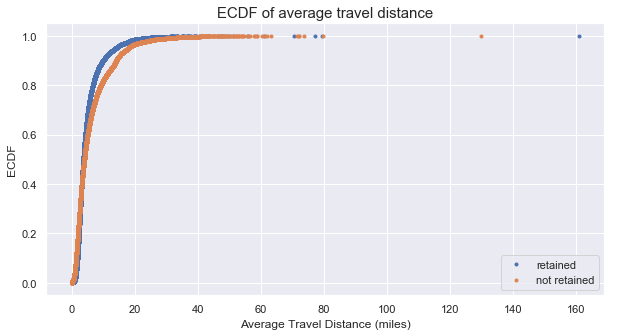

In [535]:
retained = df.avg_dist.loc[df['retained'] == 1]
not_retained = df.avg_dist.loc[df['retained'] == 0]

#set fig size
%matplotlib inline
plt.figure(figsize=(10,5))

x_active, y_active = ecdf(retained)
x_inactive, y_inactive = ecdf(not_retained)

plt.plot(x_active, y_active, marker='.', linestyle='none')
plt.plot(x_inactive, y_inactive, marker='.', linestyle='none')
plt.title('ECDF of average travel distance', size = 15)
plt.xlabel('Average Travel Distance (miles)')
plt.ylabel('ECDF')
plt.legend(['retained', 'not retained'])
plt.show()

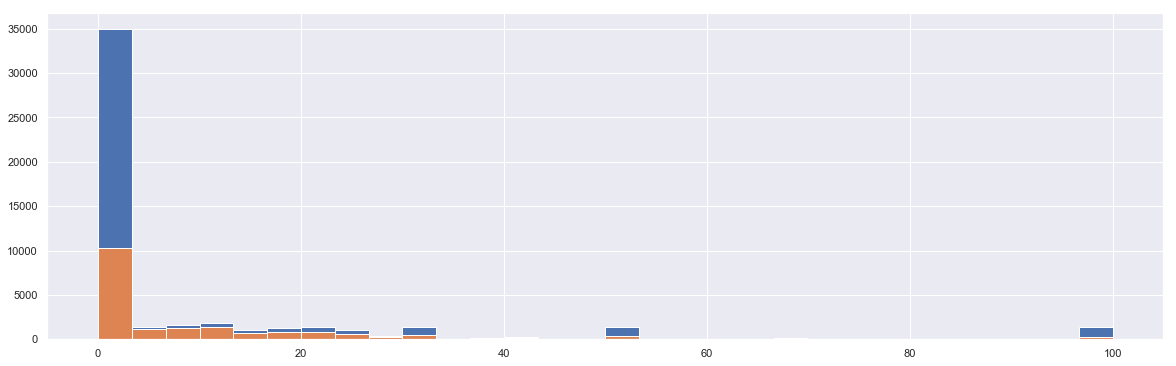

In [423]:
# Are those who took trips while the price was surging more likely to be retained?
ax = plt.figure(figsize=(20, 6))
plt.hist(df['surge_pct'], bins=30)
plt.hist(df[df['retained'] == 1]['surge_pct'], bins=30)
plt.show()

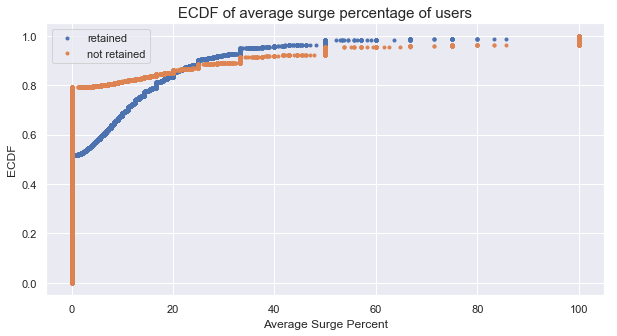

In [537]:
retained = df.surge_pct.loc[df['retained'] == 1]
not_retained = df.surge_pct.loc[df['retained'] == 0]

#set fig size
%matplotlib inline
plt.figure(figsize=(10,5))

x_active, y_active = ecdf(retained)
x_inactive, y_inactive = ecdf(not_retained)

plt.plot(x_active, y_active, marker='.', linestyle='none')
plt.plot(x_inactive, y_inactive, marker='.', linestyle='none')
plt.title('ECDF of average surge percentage of users', size = 15)
plt.xlabel('Average Surge Percent')
plt.ylabel('ECDF')
plt.legend(['retained', 'not retained'])
plt.show()

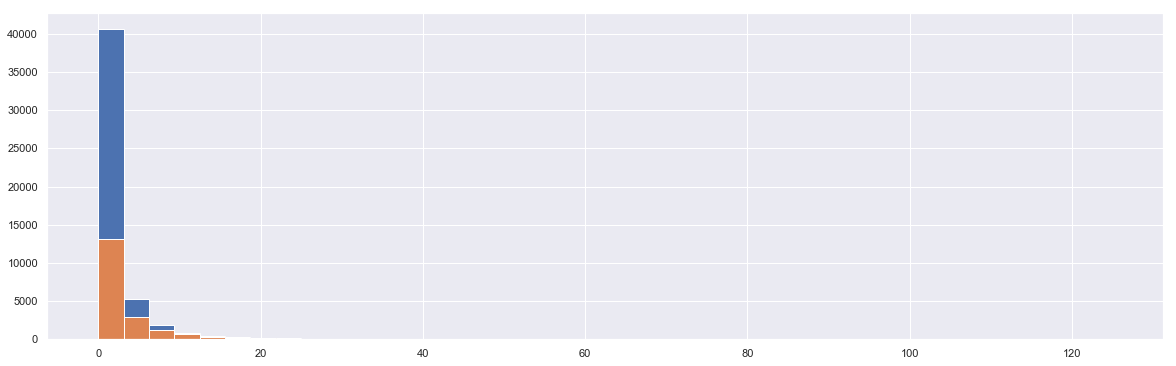

In [424]:
# Are those who took trips while the price was surging more likely to be retained?
ax = plt.figure(figsize=(20, 6))
plt.hist(df['trips_in_first_30_days'], bins=40)
plt.hist(df[df['retained'] == 1]['trips_in_first_30_days'], bins=40)
plt.show()

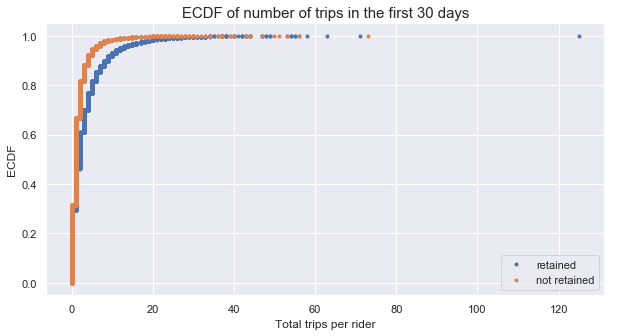

In [538]:
retained = df.trips_in_first_30_days.loc[df['retained'] == 1]
not_retained = df.trips_in_first_30_days.loc[df['retained'] == 0]

#set fig size
%matplotlib inline
plt.figure(figsize=(10,5))

x_active, y_active = ecdf(retained)
x_inactive, y_inactive = ecdf(not_retained)

plt.plot(x_active, y_active, marker='.', linestyle='none')
plt.plot(x_inactive, y_inactive, marker='.', linestyle='none')
plt.title('ECDF of number of trips in the first 30 days', size = 15)
plt.xlabel('Total trips per rider')
plt.ylabel('ECDF')
plt.legend(['retained', 'not retained'])
plt.show()

## Statistical Analysis

## Feature Engineering

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
city                       50000 non-null object
trips_in_first_30_days     50000 non-null int64
signup_date                50000 non-null datetime64[ns]
avg_rating_of_driver       50000 non-null float64
avg_surge                  50000 non-null float64
last_trip_date             50000 non-null datetime64[ns]
phone                      50000 non-null object
surge_pct                  50000 non-null float64
ultimate_black_user        50000 non-null bool
weekday_pct                50000 non-null float64
avg_dist                   50000 non-null float64
avg_rating_by_driver       50000 non-null float64
retained                   50000 non-null float64
took_trip_first_30_days    50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(8), int64(1), object(2)
memory usage: 5.0+ MB


In [425]:
# Dummy coding for col in dummy_cols
dummy_data = df
dummy_cols = ['city', 'ultimate_black_user', 'phone']
transformed = []
for col in dummy_cols:
    dummy = pd.get_dummies(dummy_data[col])
    dummy_data = pd.concat([dummy_data,dummy], axis=1)

In [426]:
# drop original columns before dummy-ing
dummy_data.drop(dummy_cols, axis=1, inplace=True)

In [450]:
log_reg_df = dummy_data[['avg_rating_of_driver','avg_rating_by_driver','trips_in_first_30_days','surge_pct', 
                         'weekday_pct', 'avg_dist', 'Astapor', 'Winterfell', "King's Landing", 
                          False, True, 'Android', 'iPhone', 'retained']]

## Machine Learning

In [451]:
# lets start out with a basic logistic regression with only a few features
from sklearn.model_selection import train_test_split
# Split data into features and label
# features X
X = log_reg_df.drop('retained', axis=1)
        
# Label y
y = log_reg_df['retained']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=3)

In [452]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

#scaler in pipeline object, use logreg algorithm
steps = [('scaler', StandardScaler()), \
         ('logreg', LogisticRegression())]
pipeline = Pipeline(steps)

# fit on training set
logreg_scaled = pipeline.fit(X_train, y_train)
# predict on test set
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.722

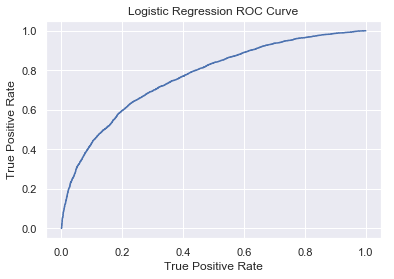

In [453]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.metrics import roc_curve

# plotting the ROC curve
y_pred_prob = pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('True Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [454]:
print(roc_auc_score(y_test, y_pred_prob))

0.7684903387586747


In [455]:
# tuning the modal
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, X, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    kf = KFold(nfold)
    for train, test in kf.split(X): # split data into train/test groups, 5 times
        clf.fit(X.iloc[train], y.iloc[train]) # fit
        result += score_func(y.iloc[test], clf.predict(X.iloc[test])) # evaluate score function on held-out data
    return result / nfold # average

In [456]:
#scaler in pipeline object, use logreg algorithm
steps = [('scaler', StandardScaler()), \
         ('logreg', LogisticRegression(max_iter=1000))]
pipeline = Pipeline(steps)
score = cv_score(pipeline, X_train, y_train)
print(score)

0.7157500000000001


In [457]:
#the grid of parameters to search over
Cs = [0.0001, 0.001, 0.1, 1, 10, 100]

# create empty dataframe 
df = pd.DataFrame(columns=['Cs', 'cv_score'])

# loop through and add scores    
for c in Cs:
    #scaler in pipeline object, use logreg algorithm
    steps = [('scaler', StandardScaler()), \
         ('logreg', LogisticRegression(C=c, max_iter=1000))]
    pipeline = Pipeline(steps)
    score = cv_score(pipeline, X_train, y_train)
    df = df.append({'Cs' : c , 'cv_score' : score} , ignore_index=True)
print(df[df.cv_score == df.cv_score.max()])

      Cs  cv_score
4   10.0  0.715775
5  100.0  0.715775


In [458]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#scaler in pipeline object, use logreg algorithm
steps = [('scaler', StandardScaler()), \
         ('logreg', LogisticRegression(C = 1, max_iter=1000))]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
score = cv_score(pipeline, X_train, y_train)
print(score)

0.7157500000000001


Next steps: 
- try ising one hot encoding instead of dummy cols
- use statistical analysis to rule in and out some variables
- if score hasn't improved yet, try some more feature engineering

In [459]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Random Forest out of the box
rfc = RandomForestClassifier(random_state=94)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print("Accuracy Score: ")
print(accuracy_score(y_test, y_pred))

[[5076 1086]
 [1292 2546]]
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81      6162
         1.0       0.70      0.66      0.68      3838

    accuracy                           0.76     10000
   macro avg       0.75      0.74      0.75     10000
weighted avg       0.76      0.76      0.76     10000

Accuracy Score: 
0.7622


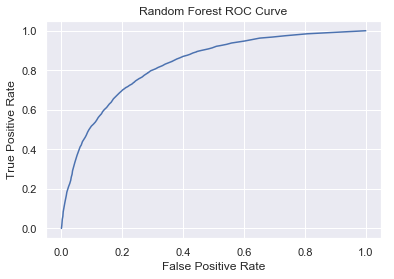

In [460]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.metrics import roc_curve

# plotting the ROC curve
y_pred_prob = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label = 'Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [461]:
print("AUROC Score: ")
print(roc_auc_score(y_test, y_pred_prob))

AUROC Score: 
0.8281815254246175


In [463]:
catboost_data = dummy_data[['avg_rating_of_driver','avg_rating_by_driver','trips_in_first_30_days','surge_pct', 
                         'weekday_pct', 'avg_dist', 'Astapor', 'Winterfell', "King's Landing", 
                          False, True, 'Android', 'iPhone', 'retained']]

In [466]:
#catboost_data.agent = catboost_data.agent.astype(str)
#catboost_data.company = catboost_data.company.astype(str)

y = catboost_data.retained
X = catboost_data.drop('retained', axis=1)

#Data splitting
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)

In [467]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

#Model training
model = CatBoostClassifier(
    custom_loss=['AUC', 'Accuracy'],
    random_seed=42,
    logging_level='Silent'
)

In [469]:
categorical_features_indices = np.where((X.dtypes != np.float) & (X.dtypes != np.int))[0]

In [470]:
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [471]:
#Cross validation
cv_params = model.get_params()
cv_params.update({
    'loss_function': 'Logloss'
})
cv_data = cv(
    Pool(X, y, cat_features=categorical_features_indices),
    cv_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [472]:
model1 = CatBoostClassifier(
    learning_rate=0.7,
    iterations=1000,
    random_seed=0,
    custom_loss=['AUC', 'Accuracy'],
    logging_level='Silent',
    train_dir='learing_rate_0.7'
)

model2 = CatBoostClassifier(
    learning_rate=0.01,
    iterations=1000,
    random_seed=0,
    custom_loss=['AUC', 'Accuracy'],
    logging_level='Silent',
    train_dir='learing_rate_0.01'
)
model1.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=categorical_features_indices,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=categorical_features_indices,
    verbose=False
)

In [473]:
from catboost import MetricVisualizer
MetricVisualizer(['learing_rate_0.01', 'learing_rate_0.7']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [480]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=1000,
    random_seed=63,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy'],
    logging_level='Silent'
#     use_best_model=False
)
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [481]:
print('Tree count: ' + str(model.tree_count_))

Tree count: 38


In [482]:
from catboost import cv

params = model.get_params()
params['loss_function'] = 'Logloss'
params['iterations'] = 1000
params['custom_loss'] = ['AUC', 'Accuracy']
params['random_seed'] = 63
params['learning_rate'] = 0.5

cv_data = cv(
    params = params,
    pool = Pool(X, label=y, cat_features=categorical_features_indices),
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=False,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [483]:
cv_data.head()

iterations  test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
0           0           0.545625          0.004582            0.544885   
1           1           0.498170          0.002299            0.497016   
2           2           0.481351          0.003506            0.479399   
3           3           0.473128          0.002596            0.470875   
4           4           0.468143          0.003258            0.465749   

   train-Logloss-std  test-AUC-mean  test-AUC-std  test-Accuracy-mean  \
0           0.003696       0.809532      0.007006             0.75520   
1           0.002115       0.836931      0.002642             0.77218   
2           0.002251       0.840935      0.004510             0.77432   
3           0.002952       0.844524      0.003846             0.77938   
4           0.002098       0.846655      0.003527             0.78118   

   test-Accuracy-std  train-Accuracy-mean  train-Accuracy-std  
0           0.005070             0.756455            0.004406  
1           0.003241             0.772840            0.002184  
2           0.003139             0.777040            0.001142  
3           0.004021             0.780860            0.001588  
4           0.004377             0.782690            0.001772

In [485]:
best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])
max_auc = np.max(cv_data['test-AUC-mean'])
max_accuracy = np.max(cv_data['test-Accuracy-mean'])
print('Best validation Logloss score, not stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)
print(max_auc)
print(max_accuracy)

Best validation Logloss score, not stratified: 0.4500±0.0032 on step 43
0.8580761951358717
0.7910999999999999
